In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
df = pd.read_pickle('test.pkl')
df.head()

,trajectory,interval_length,interval_value,well_type
0,0,0.180018,positive,shallow well
1,0,0.080008,negative,deep well
2,0,0.220022,positive,shallow well
3,0,0.520052,negative,deep well
4,0,0.010001,positive,shallow well


In [3]:
int_len = df[df['well_type'] == 'deep well']['interval_length'].to_numpy()
data_clean = int_len[int_len > 0.15]
rate = 1/np.mean(data_clean)

In [5]:
well_depth = 100
cap_small_depth = well_depth * 2
noise = (cap_small_depth/np.log(100)) * 3

theoretical_rate = 1/(np.exp(cap_small_depth/noise))
theoretical_rate

0.21544346900318836

$$
{e^{-\frac{V}{\epsilon}}}
$$

In [6]:
rate

0.4333444017567724

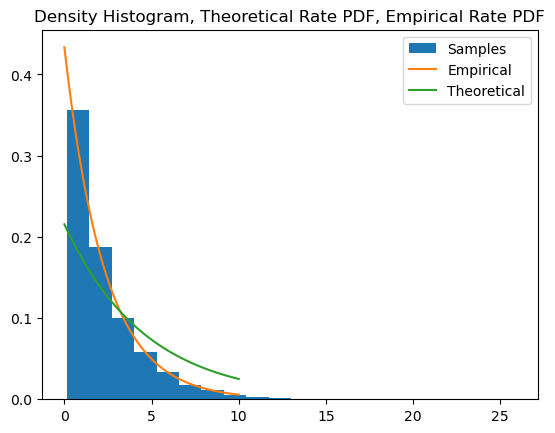

In [22]:
x = np.linspace(0,10, 100)
y = rate * np.exp(-rate * x)

plt.hist(data_clean, density=True, bins=20, label='Samples')
plt.plot(x, y, label='Empirical')
plt.plot(x, theoretical_rate * np.exp(-theoretical_rate * x), label='Theoretical')
plt.title('Density Histogram, Theoretical Rate PDF, Empirical Rate PDF')
plt.legend()
plt.show()

In [23]:
def exp_cdf(x, rate):
    return 1 - np.exp(-rate * x)

In [24]:
x_transformed = exp_cdf(data_clean, rate)
x_sort_trans = np.sort(x_transformed)

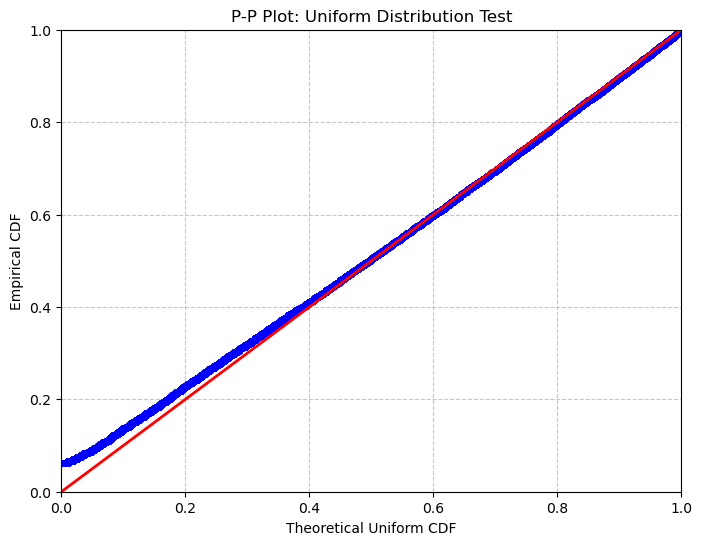

In [25]:
theoretical_points = np.linspace(0, 1, len(x_sort_trans))

plt.figure(figsize=(8, 6))
plt.plot(theoretical_points, x_sort_trans, 'bo', markersize=4)
plt.plot([0, 1], [0, 1], 'r-', linewidth=2)  # Diagonal reference line
plt.title('P-P Plot: Uniform Distribution Test')
plt.xlabel('Theoretical Uniform CDF')
plt.ylabel('Empirical CDF')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
stats.chisquare(f_obs=x_sort_trans, f_exp=theoretical_points, sum_check=False)

TypeError: chisquare() got an unexpected keyword argument 'sum_check'